In [79]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objs as go
from matplotlib.ticker import FuncFormatter
from pylab import *

In [80]:
teams = pd.read_csv('/Users/Perng/Desktop/modify/Teams.csv')
Batting = pd.read_csv('/Users/Perng/Desktop/modify/Batting.csv')
Pitching = pd.read_csv('/Users/Perng/Desktop/modify/Pitching.csv')
salaries = pd.read_csv('/Users/Perng/Desktop/modify/Salaries.csv')

In [81]:
teams = teams[teams['yearID'] >= 2011]
Batting = Batting[Batting['yearID'] >= 2011]
Pitching = Pitching[Pitching['yearID'] >= 2011]

In [82]:
#So that we can choose particular data by team and year
teams = teams.set_index(['yearID', 'teamID'])

In [83]:
#calculate salary
salaries_by_yearID_teamID = salaries.groupby(['yearID', 'teamID'])['salary'].sum()

In [84]:
teams = teams.join(salaries_by_yearID_teamID)

In [85]:
#To calculate all pitchers' data
Pitcher_strikeout_by_yearID_teamID = Pitching.groupby(['yearID', 'teamID'])['SO'].sum()
Pitcher_walk_by_yearID_teamID = Pitching.groupby(['yearID', 'teamID'])['BB'].sum()
Pitcher_RunsAllowed_by_yearID_teamID = Pitching.groupby(['yearID', 'teamID'])['R'].sum()
Pitcher_behitted_by_yearID_teamID = Pitching.groupby(['yearID', 'teamID'])['H'].sum()

In [86]:
teams['PK'] = Pitcher_strikeout_by_yearID_teamID
teams['PBB'] = Pitcher_walk_by_yearID_teamID
teams['PR'] = Pitcher_RunsAllowed_by_yearID_teamID
teams['PH'] = Pitcher_behitted_by_yearID_teamID

In [87]:
teams['WP'] = teams['W'] / (teams['W'] + teams['L'])

#batting information
teams['BA'] = teams['H']/teams['AB']
teams['OBP'] = (teams['H'] + teams['BB'] + teams['HBP']) / (teams['AB'] + teams['BB'] + teams['HBP'] + teams['SF'])
teams['SLG'] = (teams['H'] + teams['2B'] + (2*teams['3B']) + (3*teams['HR'])) / teams['AB']

#pitching information
teams['H/9'] = (teams['PH']*9) / (teams['IPouts']/3)
teams['PRA'] = (teams['PR']*9) / (teams['IPouts']/3)
teams['WHIP'] = (teams['PH'] + teams['PBB']) / (teams['IPouts']/3)
teams['K/9'] = (teams['PK']*9) / (teams['IPouts']/3)
teams['BB/9'] = (teams['PBB']*9) / (teams['IPouts']/3)
teams['K/BB'] = teams['PK'] / teams['PBB']

In [88]:
def show_pie_chart(team, year):
    # The slices will be ordered and plotted counter-clockwise.
    labels = 'On Base', '2 Base', '3 Base', 'HomeRun'
    sizes = [(teams['H'][year, team]-teams['2B'][year, team]-teams['3B'][year, team]-teams['HR'][year, team]), 
             teams['2B'][year, team], 
             teams['3B'][year, team], 
             teams['HR'][year, team]]
    explode = (0, 0, 0, 0.2)  # only "explode" HomeRun
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    
    title('Team ' + str(team) + ' Batting data in ' + str(year))

    plt.show()

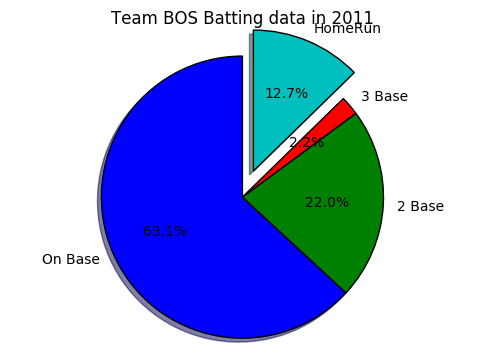

In [89]:
show_pie_chart('BOS', 2011)

In [90]:
#def millions(x, pos):
#    'The two args are the value and tick position'
#    return '$%1.1fM' % (x*1e-6)

#formatter = FuncFormatter(millions)

def show_plot_scatter(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'SLN':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#4DDB94", s=200)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#0099FF", s=200)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))     
        else:
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="grey", s=200)
    #ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Winning Percentage', fontsize=20)
    ax.set_ylabel('Number of BA', fontsize=20)
    ax.set_title('WP - BA: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()

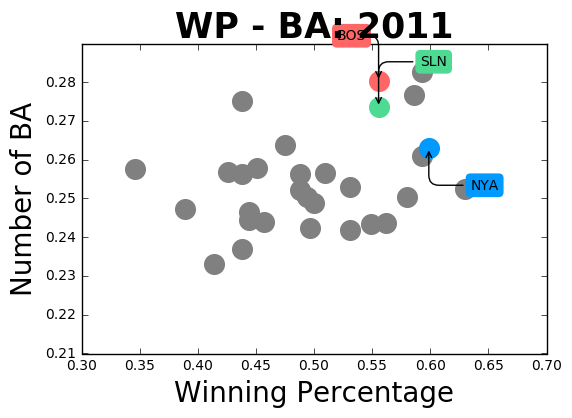

In [91]:
show_plot_scatter(teams, 2011)

In [92]:
def show_plot_bubble(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'SLN':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#4DDB94", s=teams_year['salary'][i]*1e-6)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#0099FF", s=teams_year['salary'][i]*1e-6)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#FF6666", s=teams_year['salary'][i]*1e-6)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))     
        else:
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="grey", s=teams_year['salary'][i]*1e-6)
    #ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Winning Percentage', fontsize=20)
    ax.set_ylabel('Number of BA' , fontsize=20)
    ax.set_title('WP - BA: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()

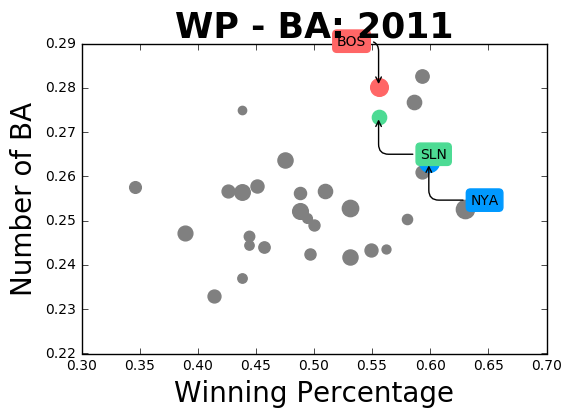

In [95]:
show_plot_bubble(teams, 2011)

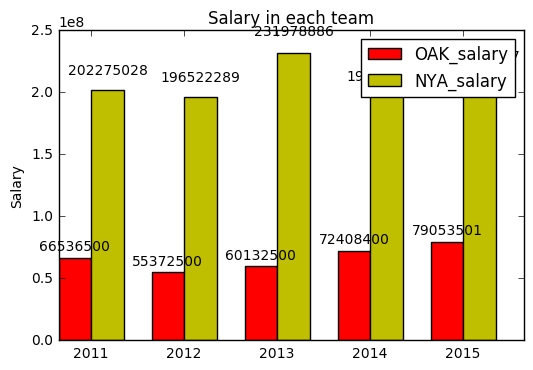

In [96]:
#show bar chart

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

OAK_salary = (teams['salary'][2011, 'OAK'], 
            teams['salary'][2012, 'OAK'], 
            teams['salary'][2013, 'OAK'], 
            teams['salary'][2014, 'OAK'], 
            teams['salary'][2015, 'OAK'])

fig,ax = plt.subplots()

rects1 = ax.bar(ind, OAK_salary, width, color='r')

NYA_salary = (teams['salary'][2011, 'NYA'], 
            teams['salary'][2012, 'NYA'], 
            teams['salary'][2013, 'NYA'], 
            teams['salary'][2014, 'NYA'], 
            teams['salary'][2015, 'NYA'])
rects2 = ax.bar(ind + width, NYA_salary, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Salary')
ax.set_title('Salary in each team')
ax.set_xticks(ind + width)
ax.set_xticklabels(('2011', '2012', '2013', '2014', '2015'))

ax.legend((rects1[0], rects2[0]), ('OAK_salary', 'NYA_salary'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()